### Import the needed package

In [1]:
# package for handling the custom scripts
import sys
sys.path.insert(0, "./../")

# package for handling the file and directory
import os
# the custom package for handling the data
import utils_preprocess as utils
# package for handling the visualization
import matplotlib.pyplot as plt

c:\Users\Bugi\miniconda3\envs\modeling\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Bugi\miniconda3\envs\modeling\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.

### Global variable

In [2]:
path_data = "./../../../dataset_used/"
path_img = os.path.join(path_data, "fundus_image")
path_mask = os.path.join(path_data, "mask_image")
path_aug = os.path.join(path_data, "aug_image")

### Create the destination directory

In [3]:
try:
    os.mkdir(path_aug)
except FileExistsError:
    print("folder already exists")

folder already exists


### Get all the files

In [4]:
images = os.listdir(path_img)
masks = os.listdir(path_mask)

### Create the augmentation images

In [6]:
utils.create_aug_img(images, path_img, path_aug)

### Visualize the clahe image

In [12]:
# Get the sample image and mask
sample_img = utils.get_file(images[0], path_img, "image")
sample_mask = utils.get_file(masks[0], path_mask, "mask")
# implement the CLAHE
clahe_image = utils.clahe(sample_img)

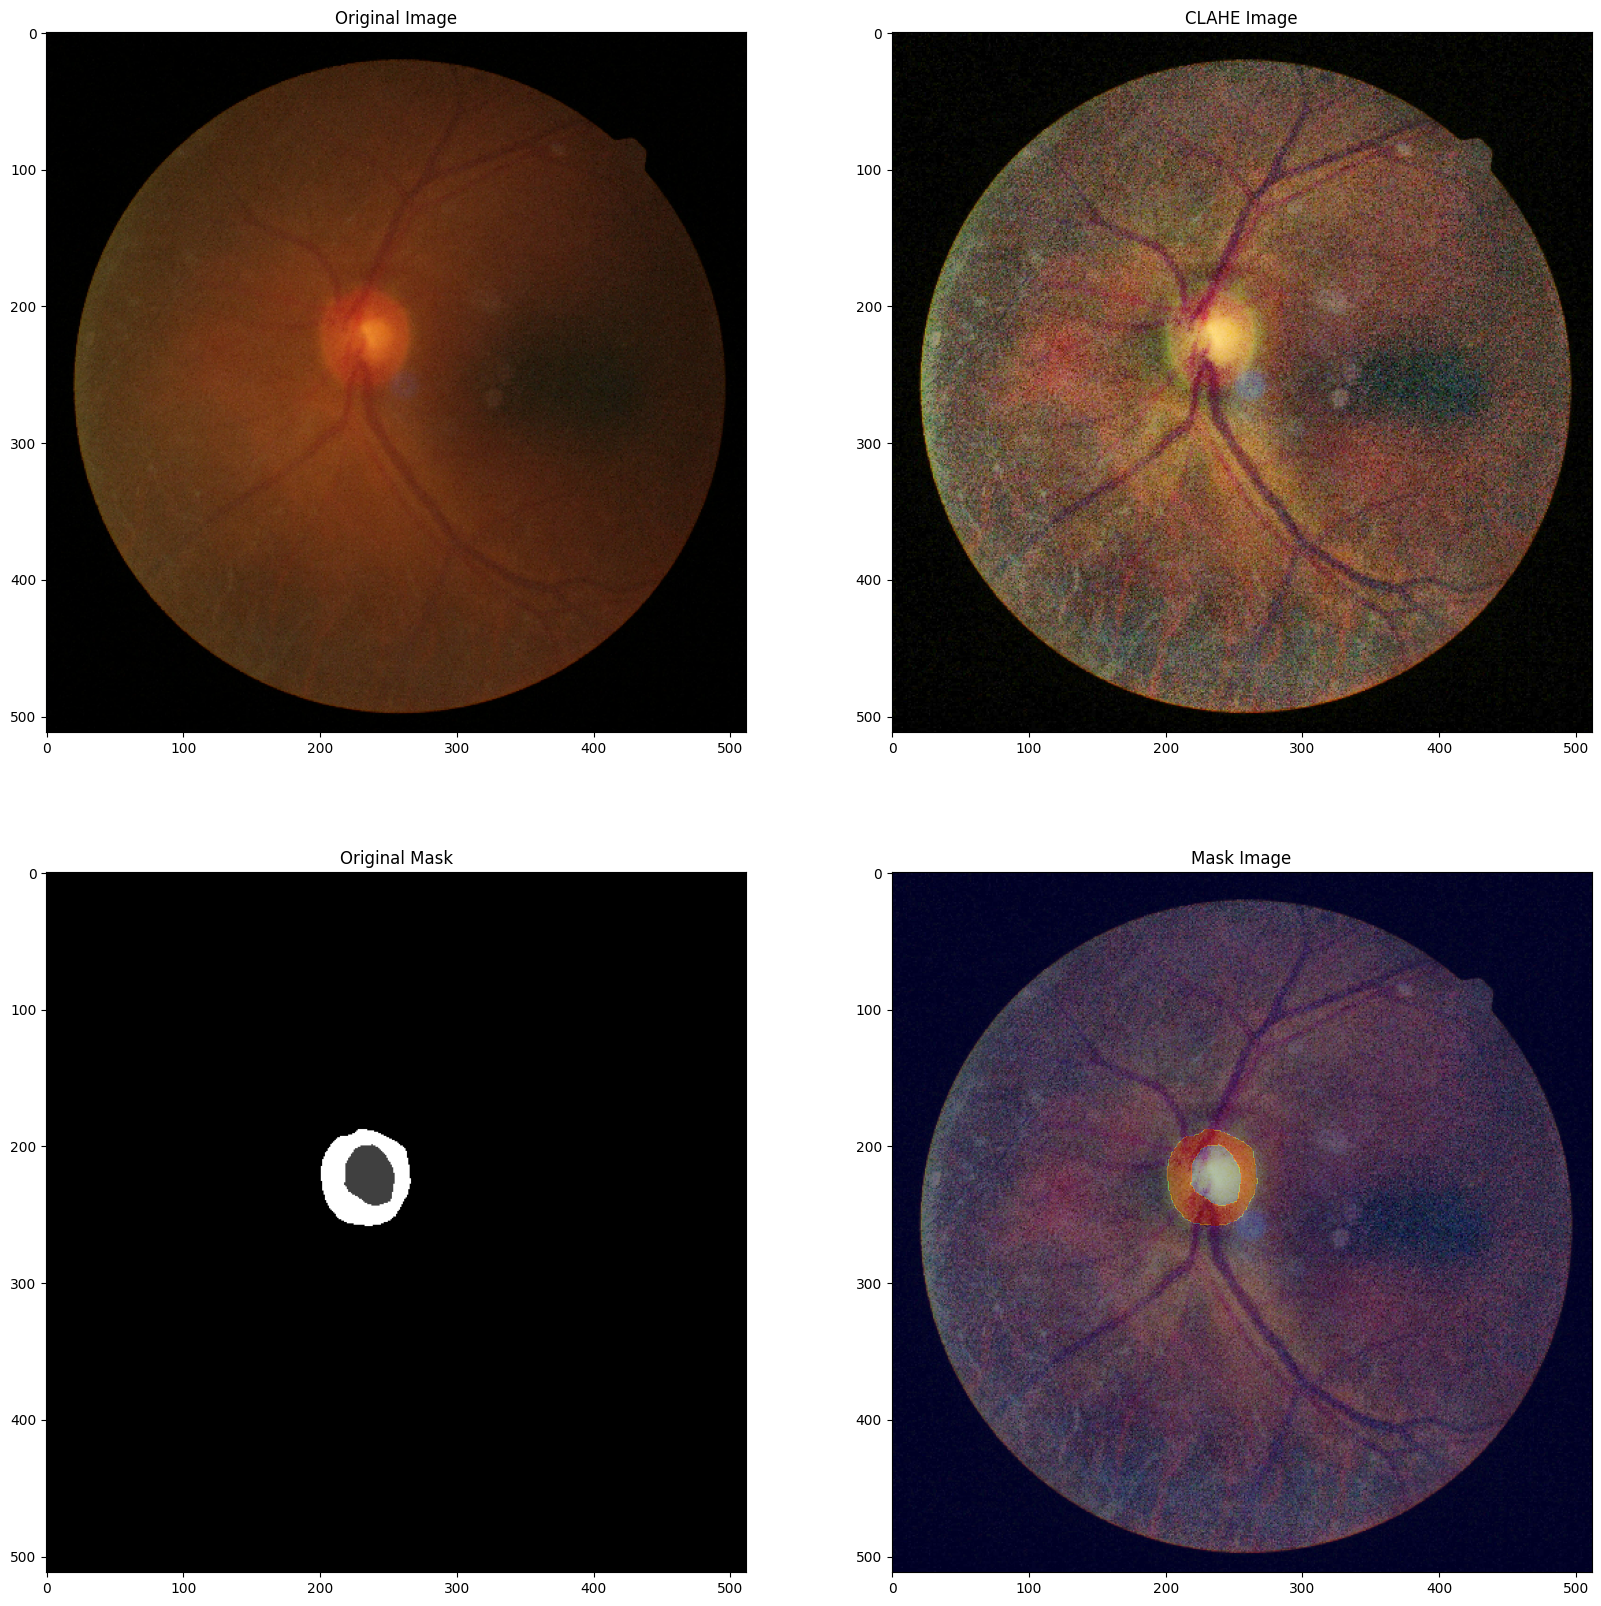

In [10]:
# Plot the image and mask
plt.figure(figsize=(20, 20))

# Visualize the original image
plt.subplot(2, 2, 1)
plt.imshow(sample_img)
plt.title("Original Image")

# Visualize the CLAHE image
plt.subplot(2, 2, 2)
plt.imshow(clahe_image)
plt.title("CLAHE Image")

# Visualize the original mask
plt.subplot(2, 2, 3)
plt.imshow(sample_mask, cmap="gray")
plt.title("Original Mask")

# Visualize the mask image
plt.subplot(2, 2, 4)
plt.imshow(clahe_image)
plt.imshow(sample_mask, cmap="jet", alpha=0.3)
plt.title("Mask Image")

plt.show()